In [3]:
import autokeras as ak
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
# load
pref = ['C4_1_','C4_5_','C4_6_', 'C4_8_', 'C4_10_']
df_d = {}
for i in range(len(pref)):
    fname  = pref[i] + 'features.csv'
    df_d[i] = pd.read_csv(fname)
#df = pd.read_csv('C4_10_features.csv')
#df_d[4]  

In [113]:
df = pd.concat(df_d.values(), ignore_index=True)
#ii = 3
#df = df_d[ii]  

In [114]:
# inspect
df

,HDF,Complexity,Mobility,classe
0,2.150808,1.438250,0.540240,0
1,1.977571,1.935658,0.397211,0
2,2.027908,1.283070,0.653880,0
3,2.093969,1.291287,0.667136,0
4,2.049368,1.350312,0.632099,0
...,...,...,...,...
30715,1.699075,2.279243,0.262907,1
30716,1.814246,1.893517,0.324222,1
30717,1.731315,2.305491,0.289293,1
30718,1.426440,3.283170,0.162773,1


In [115]:
# inspect types 
df.dtypes

HDF           float64
Complexity    float64
Mobility      float64
classe          int64
dtype: object

In [116]:
df.shape[1]

4

In [117]:
X = df.iloc[:,0:df.shape[1] -1].values
y = df.iloc[: , -1:].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, random_state=18, stratify=y)

In [142]:
# autoKeras cfg
#l_SEED   = [658,847,688,84,535,396]
#n_seeds  = 1
SEED     = 3
n_trials = 100
TUNER    = 'bayesian'#'greedy'#"hyperband"#'random'#"
#
clf = ak.StructuredDataClassifier(num_classes = 2,overwrite=True, 
                                  max_trials=n_trials, 
                                  objective='val_accuracy', 
                                  seed = SEED, tuner = TUNER)

In [143]:
%%time
# fit

#
clf.fit(x=X_train, y=y_train, validation_data =(X_test, y_test))

Trial 100 Complete [00h 00m 23s]
val_accuracy: 0.6316731572151184

Best val_accuracy So Far: 0.6396484375
Total elapsed time: 04h 11m 26s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


CPU times: user 14h 4min 2s, sys: 50min 57s, total: 14h 54min 59s
Wall time: 4h 11min 28s


In [144]:
# ak Predict
#
y_pred = clf.predict(X_test)

192/192 [==============================] - 0s 878us/step


In [145]:
# Results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      3072
           1       0.62      0.71      0.66      3072

    accuracy                           0.64      6144
   macro avg       0.64      0.64      0.64      6144
weighted avg       0.64      0.64      0.64      6144



In [146]:
# sanity check (accuracy)
print(clf.evaluate(X_test, y_test))
#tpot.score(X_test, y_test)

192/192 [==============================] - 0s 905us/step - loss: 0.6050 - accuracy: 0.6396
[0.6050277352333069, 0.6396484375]


In [147]:
# confusion matrix
cm  = confusion_matrix(y_test, y_pred)
cm

array([[1741, 1331],
       [ 883, 2189]])

In [148]:
from pretty_confusion_matrix import pp_matrix

In [149]:
#pref[ii]

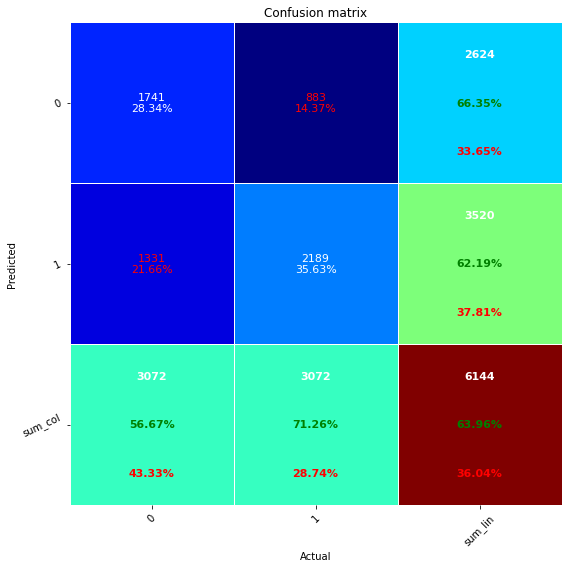

In [150]:
df_cm = pd.DataFrame(cm, range(2), range(2))
cmap  = 'jet'#'spring'#'summer'#'winter'#'RdBu'#'PuRd'#'autumn'#'prism'#
pp_matrix(df_cm, cmap=cmap)

In [153]:
# can we use data from one person to others? vice versa?

In [166]:
# load val
df_val = pd.read_csv('C4_10_features.csv')  
X_val  = df_val.iloc[:,0:df_val.shape[1] -1].values
y_val  = df_val.iloc[: , -1:].values

In [167]:
# sanity check (accuracy)
tpot.score(X_val, y_val)

/home/askery/anaconda3/envs/pycaret+/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.73974609375

In [168]:
y_pred_val = tpot.predict(X_val)

In [169]:
# confusion matrix
cm_val  = confusion_matrix(y_pred_val, y_val)
cm_val

array([[2207,  734],
       [ 865, 2338]])

In [ ]:
df.columns = ['X','y']

In [ ]:
#df = df.replace(" ", "," )
#df

In [ ]:
df.iloc[0]['X']

In [ ]:
df.replace("\n", "" )
#df